In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
trans = CPTAC.get_transcriptomics()

In [3]:
protList = ['FGFR2']

In [7]:
p_values = []
site_names = []
gene = 'FGFR2'

'''Perform a T-Test comparing protein levels when FGFR2 is mutated vs wildtype, in tumor patients only'''
for prot in protList:
        genedf = CPTAC.compare_mutations(proteomics, prot, gene)
        genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"]
        #print(genedf)
        wtdf = genedf.loc[genedf["Mutation"] == "Wildtype"]
        mutateddf = genedf.loc[genedf["Mutation"] != "Wildtype"]
        print(mutateddf)
        ttest = scipy.stats.ttest_ind(wtdf[prot], mutateddf[prot])
        p_values.append(ttest[1])
        site_names.append(prot)


      FGFR2           Mutation Patient_Type
S012  1.600  Missense_Mutation        Tumor
S017  1.520  Missense_Mutation        Tumor
S026 -0.474  Missense_Mutation        Tumor
S027 -0.656  Missense_Mutation        Tumor
S034  1.270  Missense_Mutation        Tumor
S049  1.660  Missense_Mutation        Tumor
S051  0.814  Missense_Mutation        Tumor
S059 -0.178  Missense_Mutation        Tumor
S062  0.803       In_Frame_Del        Tumor
S064  0.446  Missense_Mutation        Tumor
S073  0.321  Missense_Mutation        Tumor
S079  2.500  Missense_Mutation        Tumor
S080  0.499  Missense_Mutation        Tumor
S094  1.320    Frame_Shift_Del        Tumor


In [8]:
print(p_values)

[0.0004669293021734034]


### Plot base FGFR2 protein levels when mutated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation')]

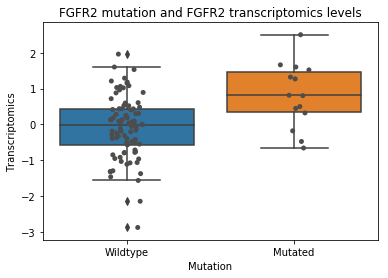

In [9]:
gene = "FGFR2"
site = "FGFR2"

genedf = CPTAC.compare_mutations(proteomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)


for i, row in genedf.iterrows():
    id = i
    if row['Mutation'] != 'Wildtype':
        genedf.set_value(id,'Mutation','Mutated')

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation",ylabel="Transcriptomics")

### Only 14 patients with mutation, may not be enough